特征数据形状 (150, 4)
目标数据形状 (150,)
特征名称 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
品种名称 ['setosa' 'versicolor' 'virginica']


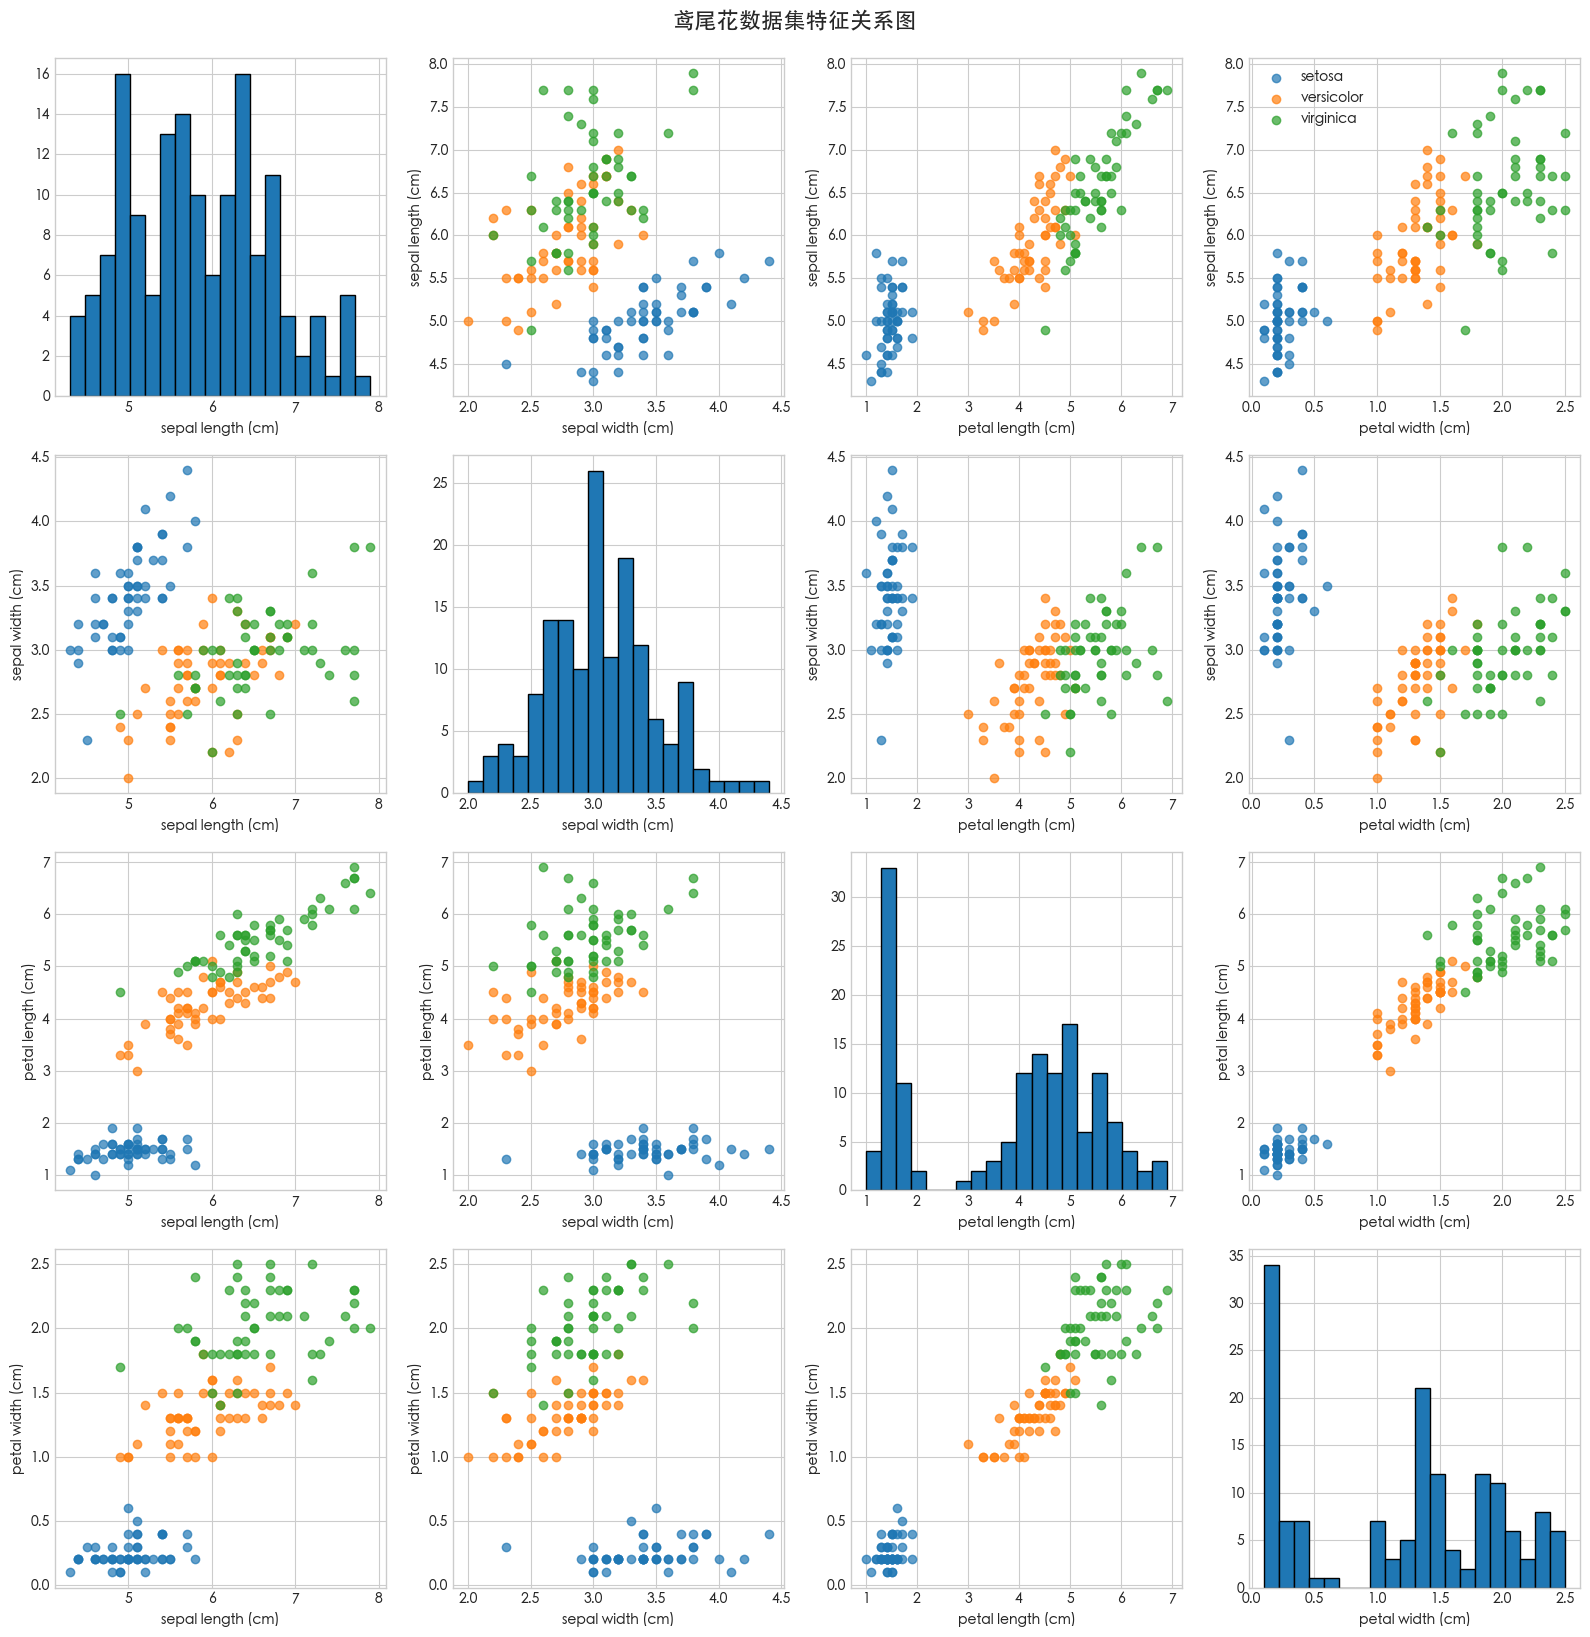

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

plt.style.use('seaborn-v0_8-whitegrid')

iris = datasets.load_iris()
X = iris.data
y = iris.target

print("特征数据形状", X.shape)
print("目标数据形状", y.shape)
print("特征名称", iris.feature_names)
print("品种名称", iris.target_names)

# 为了绘图，我们将数据转换为DataFrame，这样列就有名字了
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = y # 把品种标签也加进去

plt.rcParams["font.family"] = ["Heiti TC", "sans-serif"]
plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示为方块的问题

# 创建一个图形和坐标轴，4x4的网格
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# 双重循环，遍历所有特征组合
for i in range(4):
    for j in range(4):
        ax = axes[i, j]
        if i == j:
            # 对角线：绘制单个特征的直方图
            ax.hist(iris_df.iloc[:, i], bins=20, edgecolor='black')
            ax.set_xlabel(iris.feature_names[i])
        else:
            # 非对角线：绘制两个特征的散点图，并按品种着色
            for species_id in range(3):
                species_data = iris_df[iris_df['species'] == species_id]
                ax.scatter(species_data.iloc[:, j], species_data.iloc[:, i], 
                            label=iris.target_names[species_id], alpha=0.7)
            ax.set_xlabel(iris.feature_names[j])
            ax.set_ylabel(iris.feature_names[i])
        if j == 3 and i == 0:  # 选择一个散点图子图（比如第一行最后一列）
          ax.legend()

plt.tight_layout() # 自动调整间距
plt.suptitle('鸢尾花数据集特征关系图', y=1.02, fontsize=16)
plt.show()
